# Introduction

(Last updated: Jun 12, 2024)


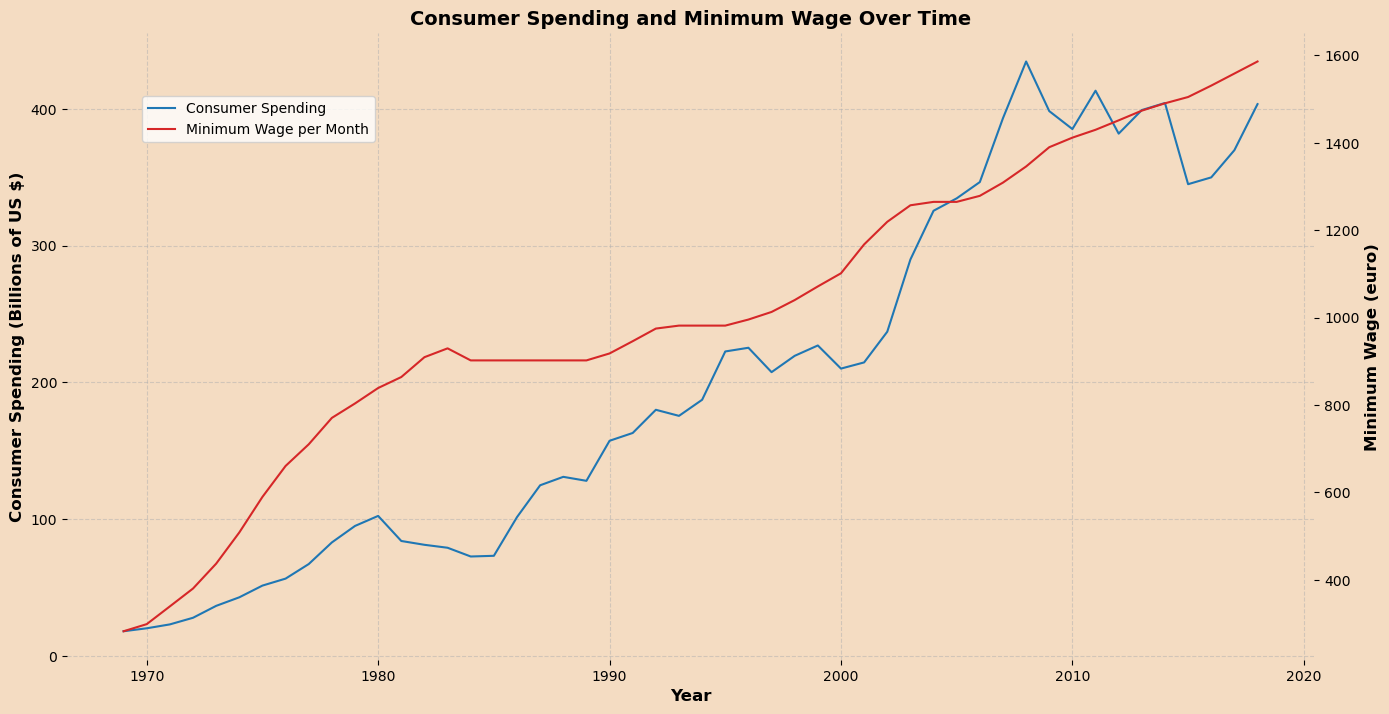

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_consumer_spending_and_minimum_wage():
    minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
    consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

    consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]

    minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
    consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

    merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

    fig, ax1 = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor('#f4dcc2')
    ax1.set_facecolor('#f4dcc2')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Consumer Spending (Billions of US $)', color='black', fontsize=12, fontweight='bold')
    ax1.plot(merged_df['year'], merged_df[' Billions of US $'], color='tab:blue', label='Consumer Spending')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.tick_params(axis='x', colors='black')

    ax1.grid(True, linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    ax2.set_facecolor('#f4dcc2')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_ylabel('Minimum Wage (euro)', color='black', fontsize=12, fontweight='bold')
    ax2.plot(merged_df['year'], merged_df['minimum wage per month (euro)'], color='tab:red', label='Minimum Wage per Month')
    ax2.tick_params(axis='y', labelcolor='black')

    plt.title('Consumer Spending and Minimum Wage Over Time', fontsize=14, fontweight='bold')

    fig.tight_layout() 
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

    fig.subplots_adjust(top=0.98)

    plt.show()

# Call the function to plot the graph
plot_consumer_spending_and_minimum_wage()


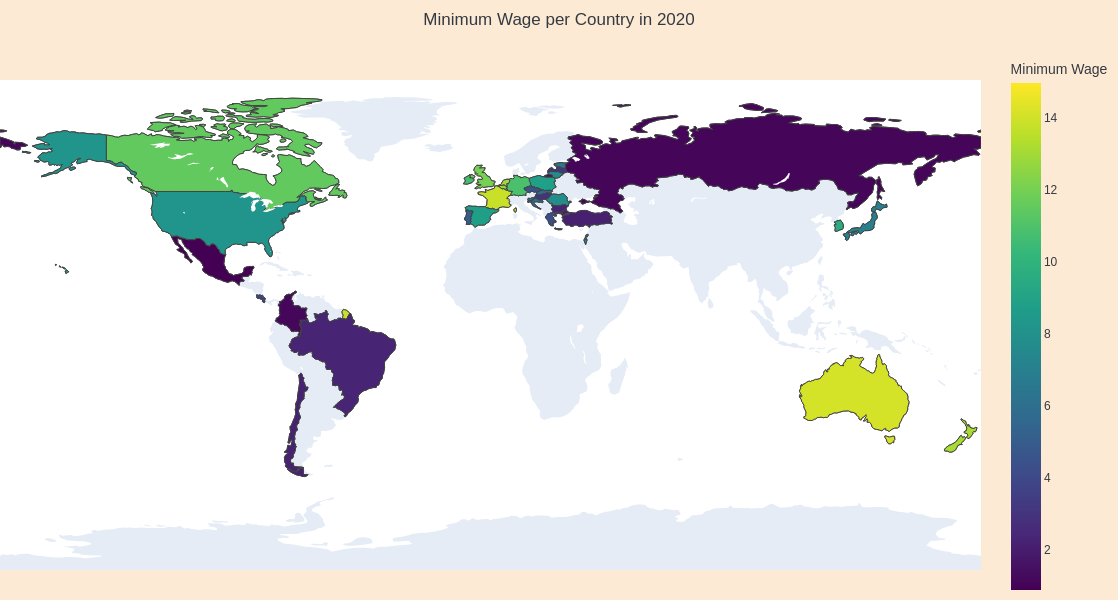

In [35]:
import plotly.express as px

# Load the data
df = pd.read_csv('minimum_wage_worldwide.csv')

# Filter the data for the year 2020
df_2020 = df[df['TIME_PERIOD'] == 2020]

# Check if necessary columns are present
required_columns = ['REF_AREA', 'OBS_VALUE']
if not all(column in df_2020.columns for column in required_columns):
    raise ValueError(f"The required columns {required_columns} are not present in the dataset.")

# Create the choropleth map
fig = px.choropleth(
    df_2020,
    locations='REF_AREA',  # Column with the country codes
    locationmode='ISO-3',  # Assuming the country codes are in ISO-3 format
    color='OBS_VALUE',  # Column with the minimum wage values
    hover_name='Reference area',  # Column to display as hover information
    color_continuous_scale='Viridis',  # Color scale for the map
    title='Minimum Wage per Country in 2020',
    labels={'OBS_VALUE': 'Minimum Wage'}
)

# Update layout for better presentation
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin=dict(l=0, r=0, t=50, b=0),
    height=600,
)

# Show the plot
fig.show()